In [0]:
!pip install numpy==1.15.4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [57]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from collections import OrderedDict, Counter
import os
import matplotlib.pyplot as plt
import networkx as nx
import codecs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Análise 2020/tweets_total.csv', encoding = 'utf-8')

In [60]:
df = df[(df['date'] > '2013-05-01 00:00:00') & (df['date'] < '2013-07-31 09:00:00')]
df.shape

(21886, 8)

In [0]:
def word_transform(words):
    total = [x.lower() for x in words]
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

In [65]:
df['tweet'] = df['tweet'].apply(lambda x: x.split())
df['tweet'] = df['tweet'].apply(word_transform)
#df['tweet'] = df['tweet'].apply(lambda x: x.split())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  del sys.path[0]


In [0]:
texto_sem_tags = ' '.join(df['tweet'].tolist())

In [67]:
texto_sem_tags

u'esc\xe2ndalo tucano pipocando galera demonizando dilma t\xe1 bem quietinha achei semelhan\xe7a pt dem desastre sa\xfade natal rn dilma sa\xfade tratada falat\xf3rios somente \u201c@blogdonoblat: dilma parecendo biruta aeroporto ricardo noblat\u201d// biruta serve orientar avi\xf5es dilma nao guenta grito affff parecendo @blogdonoblat: dilma parecendo biruta aeroporto ricardo noblat dilma envia congresso projeto aux\xedlio financeiro munic\xedpios \u2026 @blogdonoblat: "o dilma parecendo biruta aeroporto" ricardo noblat http://flipit/cmcba dilma desistido projetos demais pro gosto pior anuncia tudo ai complica \xf4 dilma coragem aten\xe7\xe3o galera l\xe1 esta "tuconona m\xf3r" brasil adivinhem fazendo atacando dilma e dilma parecendo biruta aeroporto ricardo noblat \u2026 dilma colar colou abrir m\xe3o dois anos extras cursos medicina comiss\xe3o prop\xf4s que dilma agoniza mal recuo toma decis\xe3o pressas arrepende pressionado d\xe1 continuar merc\xea grande m\xeddia - cerco inform

In [0]:
l_sem_stopwords = texto_sem_tags.split()

In [0]:
lista_tweets = df['tweet'].tolist()

In [0]:
def polariza_counter(dicionario, df1, df2):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.items():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        elif p in df2.index:
            polaridades.append(df2.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)
    print('Foram polarizadas {} palavras de um total de {} ({:.2%})'.format(num_pol, num_pal, razao_pol))
    print('A polaridade mensurada do texto é de {:.3}'.format(polaridade))
    return polaridade, ausentes

In [71]:
freq_words = Counter(l_sem_stopwords)
df_freq_words = pd.DataFrame(freq_words.values(), columns = [u'Frequência'], index=freq_words.keys())
df_freq_words = df_freq_words.sort_index(by=u'Frequência', ascending=False)
df_freq_words.index.name = u'Tokens'
df_freq_words[0:40]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,Frequência
Tokens,
dilma,20414
…,4449
aprovação,3076
-,2790
cai,2603
pesquisa,1779
pt,1305
queda,1009
pontos,947


In [0]:
def plot_word_histogram(freqs, show=10, title=None):
    """Plot a histogram of word frequencies, limited to the top <show> ones.
    """
    sorted_f = sort_freqs(freqs) if isinstance(freqs, dict) else freqs

    # Don't show the tail
    if isinstance(show, int):
        # interpret as number of words to show in histogram
        show_f = sorted_f[-show:]
    else:
        # interpret as a fraction
        start = -int(round(show*len(freqs)))
        show_f = sorted_f[start:]

    # Now, extract words and counts, plot
    n_words = len(show_f)
    ind = np.arange(n_words)
    words = [i[0] for i in show_f]
    counts = [i[1] for i in show_f]

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
  

    if n_words<=20:
        # Only show bars and x labels for small histograms, they don't make
        # sense otherwise
        ax.bar(ind, counts)
        ax.set_xticks(ind)
        ax.set_xticklabels(words, rotation=45)
        fig.subplots_adjust(bottom=0.25)
    else:
        # For larger ones, do a step plot
        ax.step(ind, counts)

    # If it spans more than two decades, use a log scale
    if float(max(counts))/min(counts) > 100:
        ax.set_yscale('log')

    if title:
        ax.set_title(title)
    return ax

Number of unique words: 24263


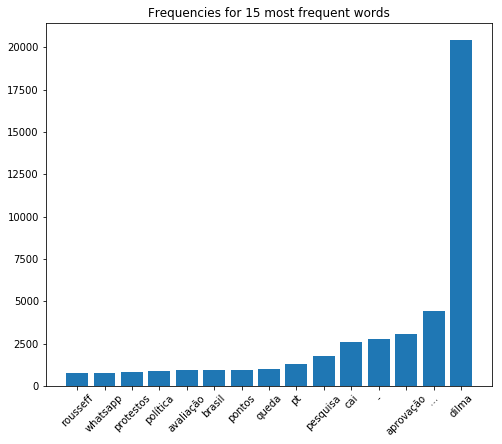

In [73]:
number_words=15      
w_items = freq_words.items()
w_items.sort(key = lambda wc: wc[1])
print 'Number of unique words:',len(w_items)
#print('{} least frequent words:').format(number_words)
#print_vk(w_items[:10])
#print('{} most frequent words:').format(number_words)
#print_vk(w_items[:-10:-1])
plot_word_histogram(w_items, number_words,'Frequencies for {} most frequent words'.format(number_words));

In [0]:
datapath = '/content/drive/My Drive/Projeto Ana/Análise 2020/'
oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'
sentilex1 = 'SentiLex-PT02/SentiLex-lem-PT02.txt'
sentilex2 = 'SentiLex-PT02/SentiLex-flex-PT02.txt'

In [75]:
df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'],  inplace=True)
df_o = df_o.set_index(u'palavra')
print(u'Corpus com {} palavras polarizadas'.format(len(df_o)))

Corpus com 32119 palavras polarizadas


In [76]:
df_s1 = pd.read_csv(os.path.join(datapath,sentilex1), header=None, encoding='utf-8', delimiter='.', names=[u'palavra',u'polaridade'])
conserta_pol1 = lambda x: int(x.split(';')[2].split('=')[1])
df_s1.polaridade = df_s1.polaridade.apply(conserta_pol1)
df_s1.drop_duplicates(subset=[u'palavra'], inplace=True)
df_s1 = df_s1.set_index(u'palavra')
print(u'Corpus com {} palavras polarizadas'.format(len(df_s1)))

Corpus com 7010 palavras polarizadas


In [77]:
df_s2 = pd.read_csv(os.path.join(datapath,sentilex2), header=None, encoding='utf-8', delimiter='.', names=[u'palavra',u'polaridade'])
conserta_pol2 = lambda x: int(x.split(';')[3].split('=')[1])
df_s2.polaridade = df_s2.polaridade.apply(conserta_pol2)
conserta_palavra = lambda x: x.split(',')[0]
df_s2.palavra = df_s2.palavra.apply(conserta_palavra)
df_s2.drop_duplicates(subset=[u'palavra'],  inplace=True)
df_s2 = df_s2.set_index(u'palavra')
print(u'Corpus com {} palavras polarizadas'.format(len(df_s2)))

Corpus com 79190 palavras polarizadas


In [78]:
polariza_counter(freq_words, df_o, df_s2);

Foram polarizadas 4192 palavras de um total de 24263 (17.28%)
A polaridade mensurada do texto é de -0.137


Vamos visualizar as palavras mais frequentes de várias formas:

In [0]:
def print_vk(lst):
    """Print a list of value/key pairs nicely formatted in key/value order."""

    # Find the longest key: remember, the list has value/key pairs, so the key
    # is element [1], not [0]
    longest_key = max([len(word) for word, count in lst])
    # Make a format string out of it
    fmt = '%'+str(longest_key)+'s -> %s'
    # Do actual printing
    for k,v in lst:
        print(fmt % (k,v))
    print('\n')

In [0]:
def all_pairs(items):
    """Make all unique pairs (order doesn't matter)"""
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
    """Return histogram of co-occurrences of words in a list of lines.

    Parameters
    ----------
    lines : list
      A list of strings considered as 'sentences' to search for co-occurrences.

    words : list
      A list of words from which all unordered pairs will be constructed and
      searched for co-occurrences.
    """
    wpairs = all_pairs(words)

    # Now build histogram of co-occurrences
    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    """Convert a word histogram with co-occurrences to a weighted graph.
    Edges are only added if the count is above cutoff.
    """
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [81]:
n_nodes = 12
popular = w_items[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = co_occurrences(lista_tweets, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
wgraph = list(nx.connected_component_subgraphs(wgraph))[0]
centrality = nx.eigenvector_centrality_numpy(wgraph)
c = centrality.items()
c.sort(key=lambda x:x[1], reverse=True)
print '\nGraph centrality'
for node, cent in c:
    print "%15s: %.3g" % (node, float(cent))


Graph centrality
       pesquisa: 0.289
       política: 0.289
      avaliação: 0.289
             pt: 0.289
          queda: 0.289
         pontos: 0.289
            cai: 0.289
      aprovação: 0.289
         brasil: 0.289
              -: 0.289
              …: 0.289
          dilma: 0.289


In [0]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    """Rescale an array to a new range.
    Return a new array whose range of values is (amin, amax).
    Parameters
    ----------
    arr : array-like
    amin : float
      new minimum value
    amax : float
      new maximum value

    Examples
    --------
    >>> a = np.arange(5)
    >>> rescale_arr(a,3,6)
    array([ 3.  ,  3.75,  4.5 ,  5.25,  6.  ])
    """
    # old bounds
    m = arr.min()
    M = arr.max()
    # scale/offset
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    # Apply clip before returning to cut off possible overflows outside the
    # intended range due to roundoff error, so that we can absolutely guarantee
    # that on output, there are no values > amax or < amin.
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
    """Conveniently summarize graph visually"""

    # config parameters
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

    # Create figure
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

    # Plot nodes with size according to count
    sizes = []
    degrees = []
    for n, d in wgraph.nodes(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    # Compute layout and label edges according to weight
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    # Draw
    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,
                           alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width,
                           edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels, 
                                 font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):
    """Compute a layout based on centrality.
    """
    # Create a list of centralities, sorted by centrality value
    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

Graph visualization for query:


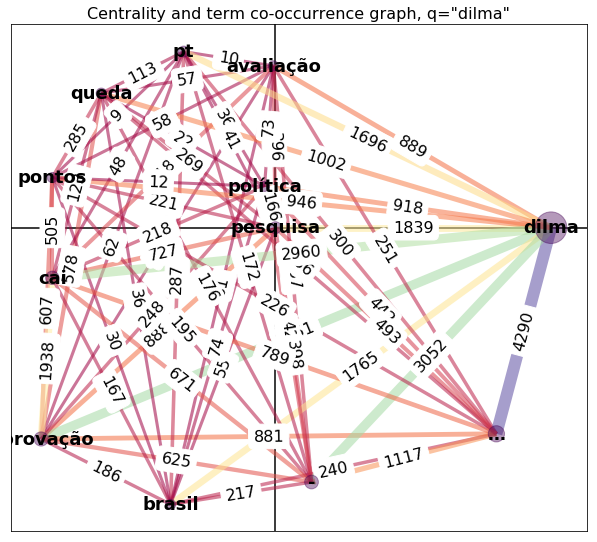

In [84]:
query = 'dilma'
print "Graph visualization for query:"
plot_graph(wgraph, centrality_layout(wgraph, centrality), 
           plt.figure(figsize=(8,8)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

In [0]:
wgraph.nodes

NodeView(('\xc3\xa9', 'n\xc3\xa3o', 'brasil', 'pt', 'queda', 'dilma', 'pesquisa', '-', 'pontos', 'cai', 'aprova\xc3\xa7\xc3\xa3o', 'at\xc3\xa9'))